# Photos by Prokudin-Gorsky

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float
from skimage import img_as_ubyte
import numpy as np
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
def combine_channels(img):
    
    heigth = int(img.shape[0] / 3)
    weigth = int(img.shape[1])
    PGr = img[0:heigth, 0:weigth]
    PGg = img[heigth:heigth * 2, 0:weigth]
    PGb = img[heigth * 2:heigth * 3, 0:weigth]
    
    crl = int(heigth * 0.05)
    crr = int(heigth * 0.95)
    cru = int(weigth * 0.05)
    crd = int(weigth * 0.95)
    fPGr = PGr[crl:crr, cru:crd].astype('int64')
    fPGg = PGg[crl:crr, cru:crd].astype('int64')
    fPGb = PGb[crl:crr, cru:crd].astype('int64')

    a = [0 for i in range(31)]
    j = -15
    for i in range(31):
        a[i] = j + i
        
    corr_m_G = [[0 for x in range(31)] for y in range(31)]
    corr_m_B = [[0 for x in range(31)] for y in range(31)]
            
    Tg = fPGg
    Tb = fPGb
    new_img = np.zeros((fPGr.shape[0], fPGr.shape[1], 3), dtype=np.uint8)
    
    colls = float('-inf')
    rows = float('-inf')
    bcorr = float('-inf')
    for i in range(31):
        for j in range(31):
            vimg = np.roll(Tg, a[i], axis=0)
            himg = np.roll(vimg, a[j], axis=1)

            corr = (fPGr * himg).sum()
            corr_m_G[i][j] = corr
            if corr > bcorr:
                bcorr = corr
                colls = a[i]
                rows = a[j]
    
    colls1 = float('-inf')
    rows1 = float('-inf')
    bcorr1 = float('-inf')            
    for i in range(31):
        for j in range(31):
            vimg1 = np.roll(Tb, a[i], axis=0)
            himg1 = np.roll(vimg1, a[j], axis=1)

            corr1 = (fPGr * himg1).sum()
            corr_m_B[i][j] = corr1
            if corr1 > bcorr1:
                bcorr1 = corr1
                colls1 = a[i]
                rows1 = a[j]
        
    new_img[:, :, 1] = np.roll(np.roll(Tg, colls, axis=0), rows, axis=1)
    new_img[:, :, 0] = np.roll(np.roll(Tb, colls1, axis=0), rows1, axis=1)
    new_img[:, :, 2] = fPGr
    
    return new_img

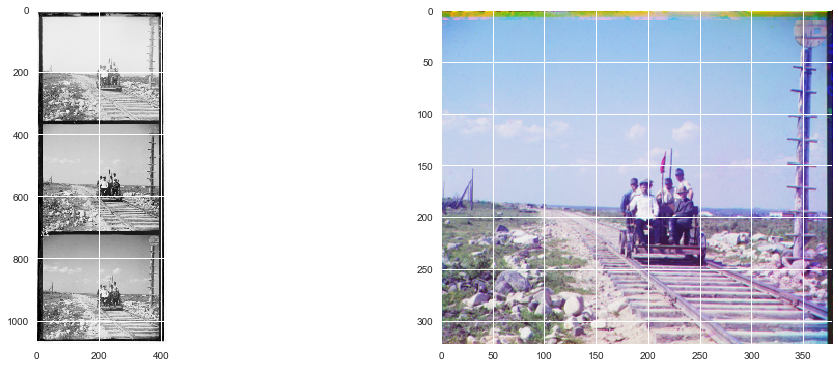

In [15]:
test_img = imread("00.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

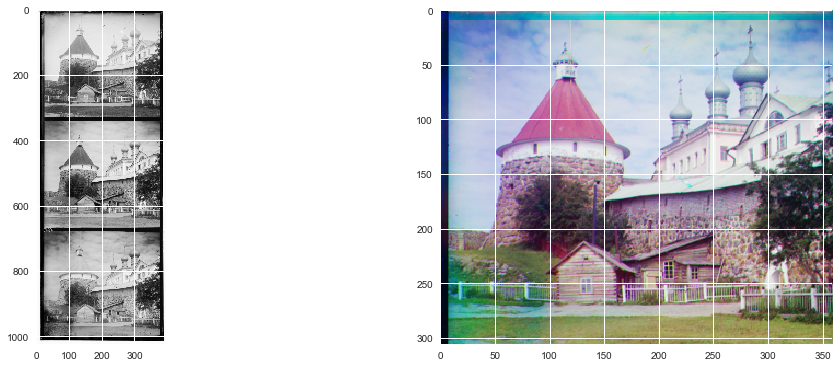

In [16]:
test_img = imread("01.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

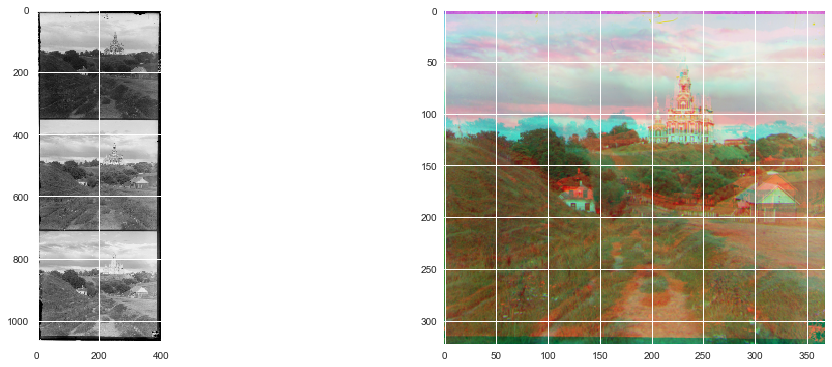

In [17]:
test_img = imread("02.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

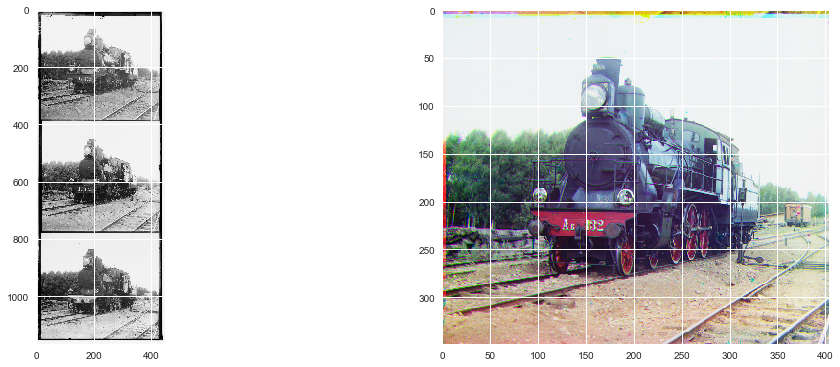

In [18]:
test_img = imread("03.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

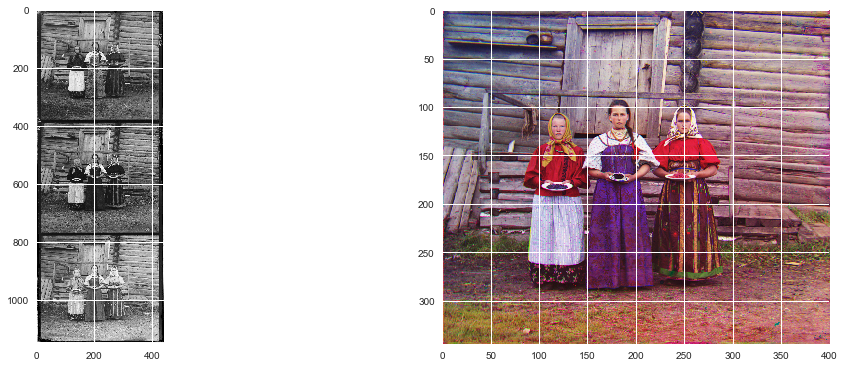

In [19]:
test_img = imread("04.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

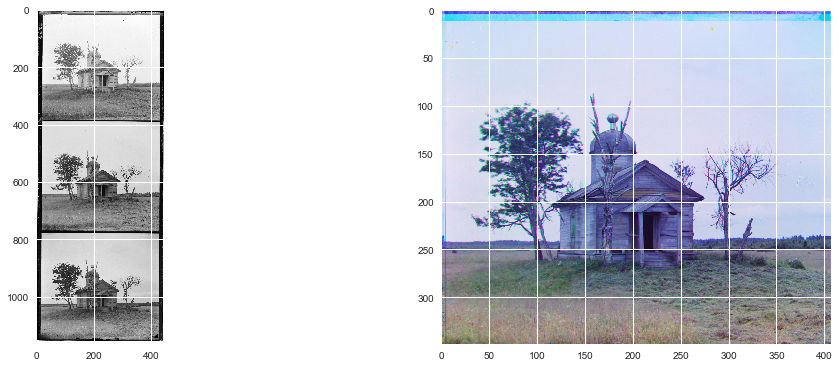

In [21]:
test_img = imread("06.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

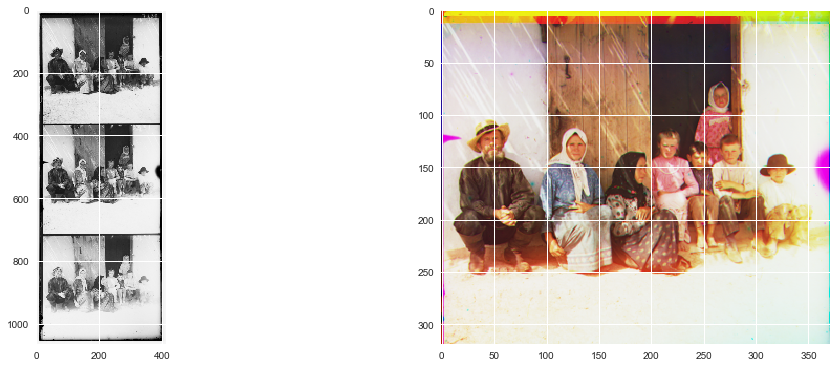

In [22]:
test_img = imread("07.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

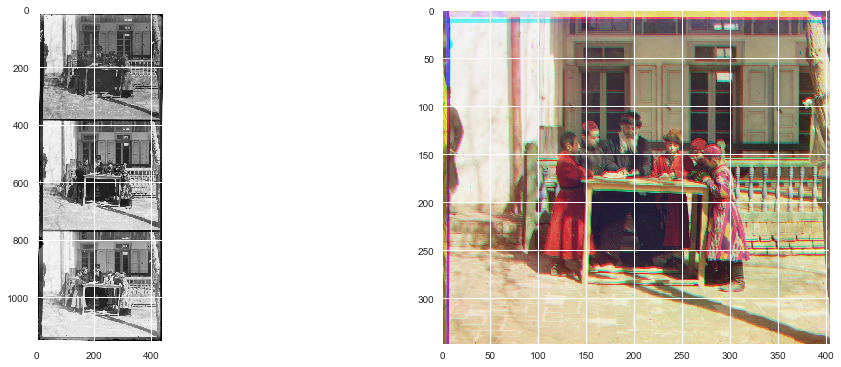

In [23]:
test_img = imread("08.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))

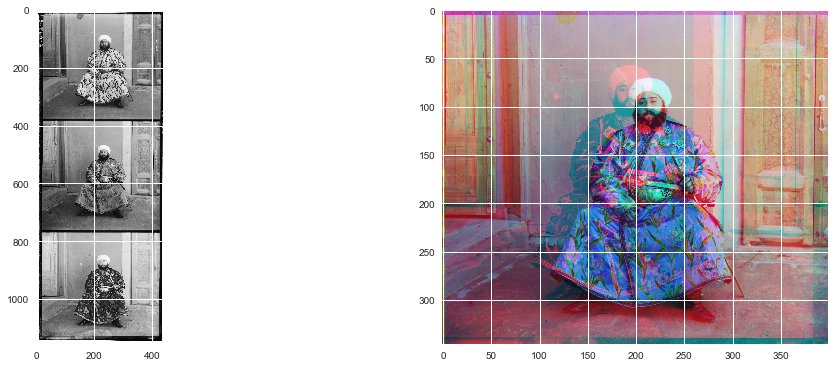

In [24]:
test_img = imread("09.png", as_gray = 'true')

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(test_img)
plt.subplot(222)
imshow(combine_channels(test_img))